In [1]:
import os
import numpy as np
import numpy.random as npr
import pickle
import matplotlib.pyplot as plt
import sys
import json
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from pathlib import Path
import dotenv
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 
sys.path.insert(0, PATH_YANGNET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance
from tools_lnd import make_h_all, PC_axes, get_T_inds, make_dendro, gen_trials_from_model_dir

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
# ##################################################################
# #fig save path
# ##################################################################
fig = 'fig5'
figpath = os.path.join(p_code,'figs',fig,fig+'_ADGJMP')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [7]:
rule_trains = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
          'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
          'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_set_names = ['DelayPro', 'ReactPro', 'MemoryPro', 'DelayAnti', 'ReactAnti', 'MemoryAnti',
              'IntegrationModality1', 'IntegrationModality2', 'ContextIntModality1', 'ContextIntModality2', 'IntegrationMultimodal',
              'ReactMatch2Sample', 'ReactNonMatch2Sample', 'ReactCategoryPro', 'ReactCategoryAnti']

# ##################################################################
# #Find right model dir
# ##################################################################
data_fldr = 'fig3'
file = 'LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1'
m = os.path.join(p_data,data_fldr,file)

In [8]:
def make_label_sets(rule_trains):
    
    rule_trains_random = np.random.permutation(rule_trains)
    print(rule_trains_random)
    
    label_set = {}
    label_set['Anti'] = [('anti' in rule) for rule in rule_trains]
    label_set['Delay'] = [('delay' in rule) or ('fd' in rule) for rule in rule_trains]
    label_set['Contin Mem.'] = [('delay' in rule) for rule in rule_trains]
    label_set['Cat Mem.'] = ['dmc' in rule for rule in rule_trains]
    label_set['Modality2'] = ['dm2' in rule for rule in rule_trains]
    label_set['Modality1'] = ['dm1' in rule for rule in rule_trains]
    label_set['Random2'] = ['dm2' in rule for rule in rule_trains_random]
    label_set['Random3'] = ['anti' in rule for rule in rule_trains_random]
    label_set['Random9'] = [('delay' in rule) or ('fd' in rule) for rule in rule_trains_random]

    label_reverse_set = {}
    label_reverse_set['Anti'] = ~np.array(label_set['Anti'])
    label_reverse_set['Delay'] = ~np.array(label_set['Delay'])
    label_reverse_set['Contin Mem.'] = label_set['Cat Mem.']
    label_reverse_set['Cat Mem.'] = label_set['Contin Mem.']
    label_reverse_set['Modality2'] = ['dm1' in rule for rule in rule_trains]
    label_reverse_set['Modality1'] = ['dm2' in rule for rule in rule_trains]
    label_reverse_set['Random2'] = ['dm1' in rule for rule in rule_trains_random]
    label_reverse_set['Random3'] = ~np.array(label_set['Random3'])
    label_reverse_set['Random9'] = ~np.array(label_set['Random9'])
    return label_set, label_reverse_set

In [9]:
label_set,label_reverse_set = make_label_sets(rule_trains)

['dmcnogo' 'delaydm1' 'contextdelaydm1' 'fdanti' 'reactgo'
 'contextdelaydm2' 'multidelaydm' 'delaygo' 'fdgo' 'dmsnogo' 'dmsgo'
 'reactanti' 'delaydm2' 'dmcgo' 'delayanti']


In [10]:
import matplotlib.patches as mpatches
from scipy.cluster import hierarchy
color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                 '#e41a1c', '#dede00']
hierarchy.set_link_color_palette(color_palette)
alphabet = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'f', 7:'g', 8:'h', 9:'i', 10:'j', 11:'k', 12:'l', 13:'m', 14:'n', 15:'o', 16:'p', 17:'q', 18:'r', 19:'s', 20:'t', 21:'u', 22:'v', 23:'w', 24:'x', 25:'y', 26:'z'}

In [11]:
lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'
save_dir = os.path.join(m,lesion_folder)

cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
lesion_var = np.load(os.path.join(save_dir,'lesion_var.npz'))

perfs_changes = lesion_var['perfs_changes']

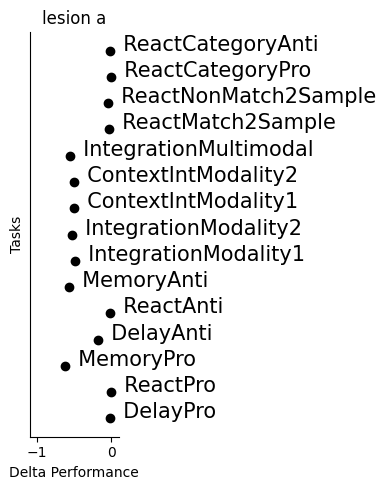

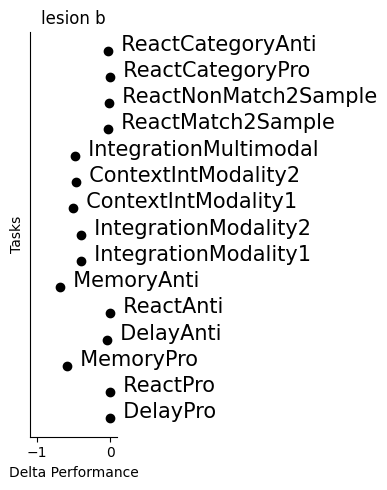

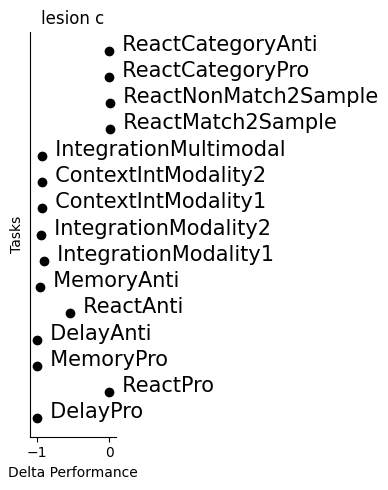

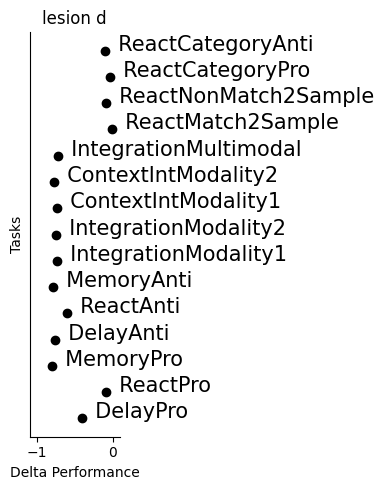

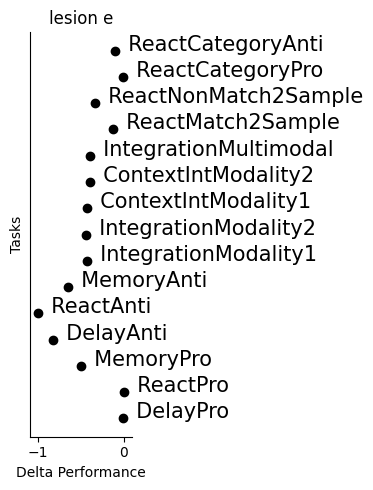

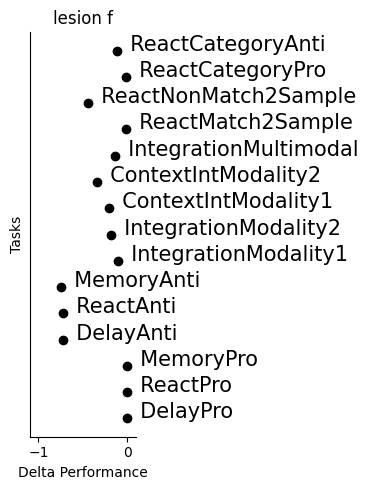

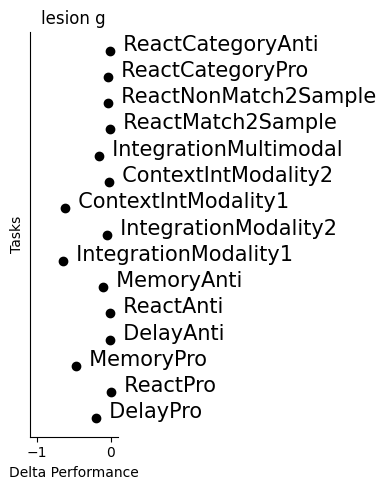

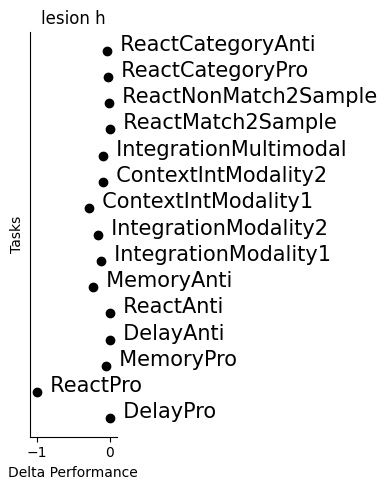

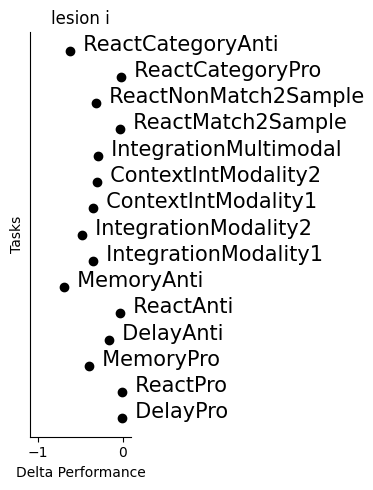

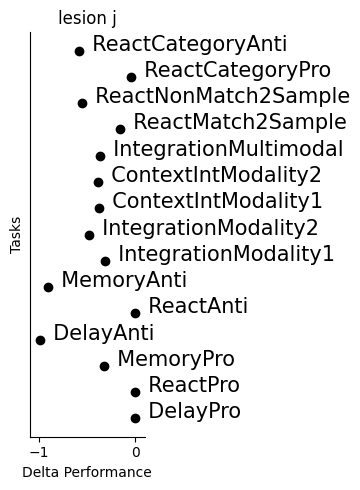

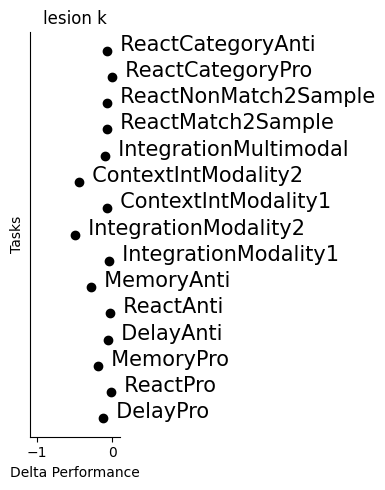

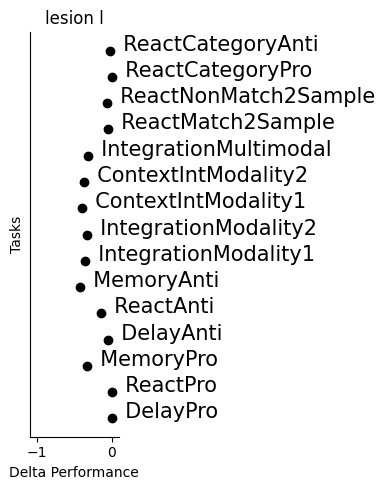

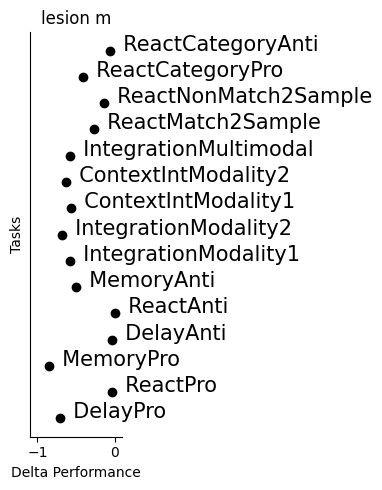

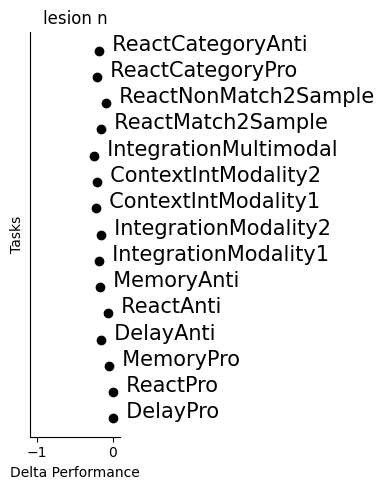

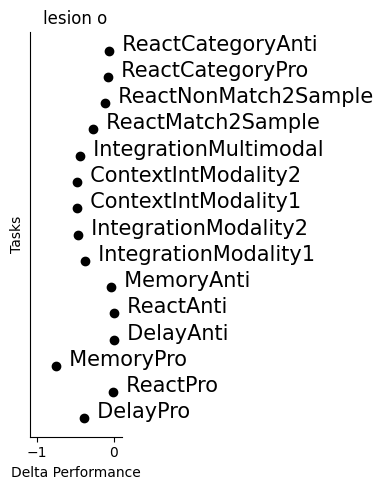

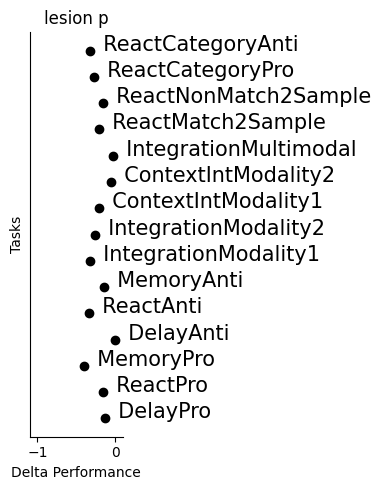

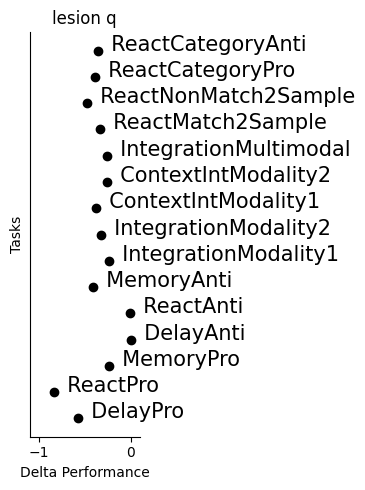

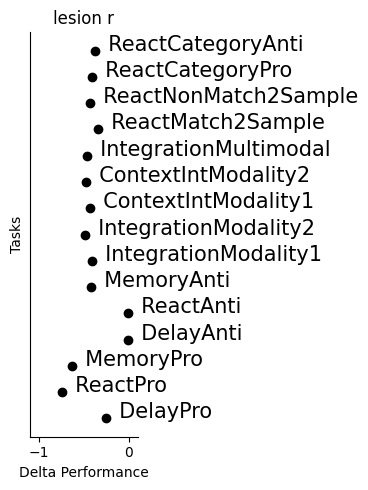

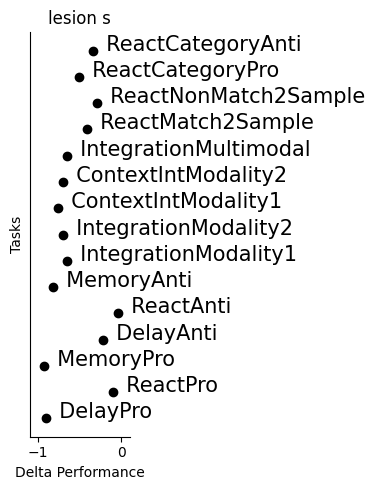

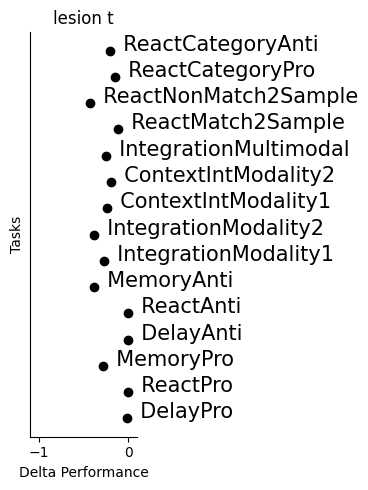

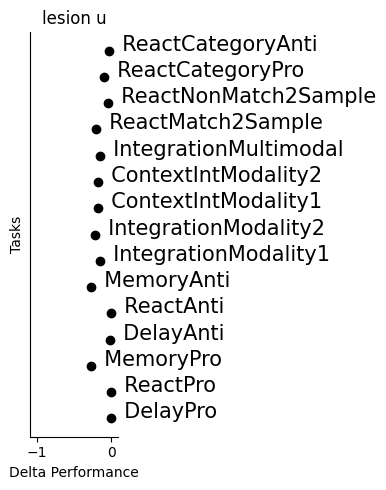

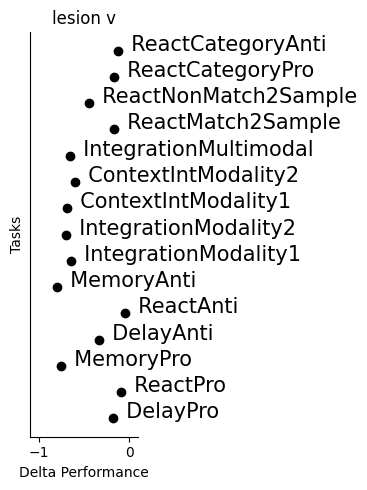

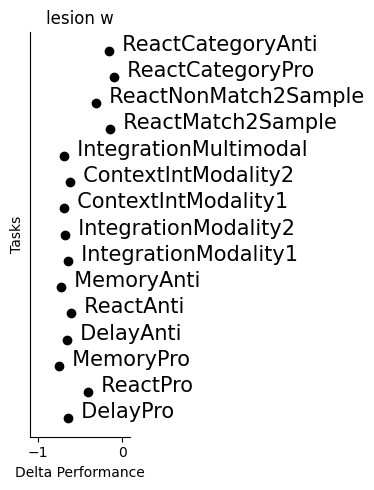

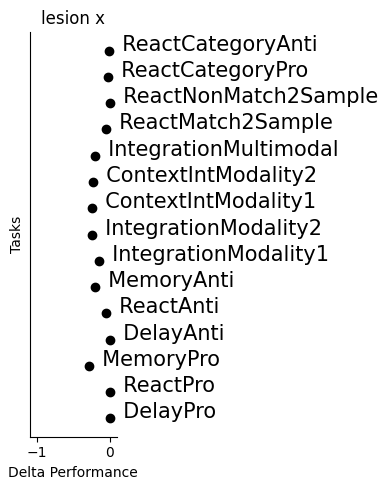

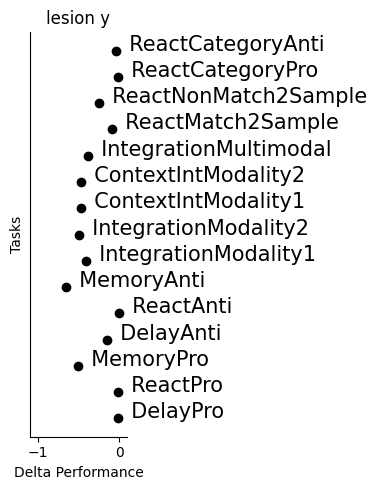

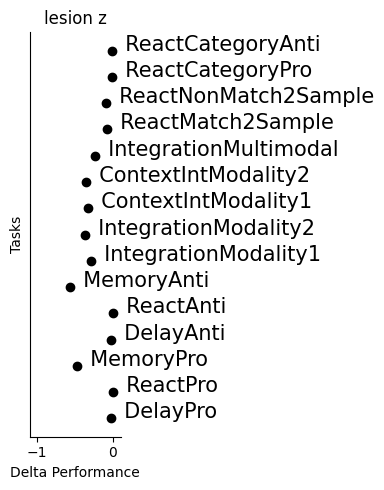

In [12]:
for l in range(len(perfs_changes)):
    fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
    ax = plt.subplot(121)
#     ax2 = plt.subplot(122)
    for y in range(15):
        plt.text(perfs_changes[l,y],y,'  '+rule_set_names[y],fontsize = 15)
        plt.plot(perfs_changes[l,y],y,'ok')
    plt.xlim((-1.1,.1))
    plt.title('lesion '+ alphabet[l+1])
    plt.xlabel('Delta Performance')
    plt.ylabel('Tasks')
    plt.yticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    figname = 'perf_change'+'_lesion_'+ alphabet[l+1]
    plt.savefig(os.path.join(figpath,figname+'.pdf'),bbox_inches='tight')
    
    plt.show()

/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_12665/4071040724.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect=mpatches.Rectangle((text_xloc,text_yloc),.7,.3,
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_12665/4071040724.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect=mpatches.Rectangle((text_xloc,text_yloc),.7,.3,
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_12665/4071040724.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect=mpatches.Rectangle((text_xloc,text_yloc),.7,.3,
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_12665/4071040724.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect=mpatches.Rectangle((text_xloc,text_yloc),.7,.3,


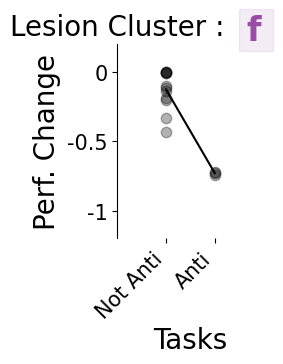

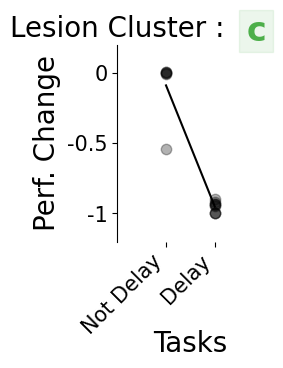

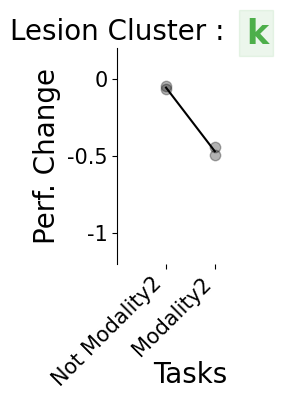

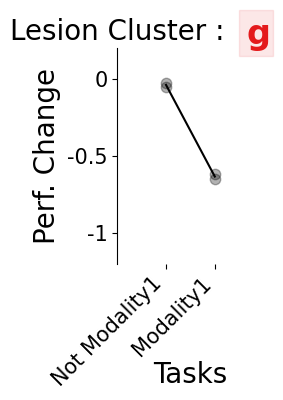

In [13]:
cluster_number = {}
cluster_number['Anti'] = 5
cluster_number['Delay'] = 2
cluster_number['Modality2'] = 10
cluster_number['Modality1'] = 6
cluster_names = ['Anti','Delay','Modality2','Modality1']

# cluster_number['Cat Mem.'] = 12
# cluster_number['Contin Mem.'] = 0
# cluster_names = ['Cat Mem.','Contin Mem.']

save_dir = os.path.join(figpath,'lesion_clusters_combined')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
fontsize = 20
tick_fontsize = fontsize*.75
label_fontsize = fontsize*1
plt.rcParams.update({'font.size': fontsize})

for key_i in range(len(cluster_number.keys())):
    
    fig = plt.figure(figsize=(3,4.5),tight_layout=True,facecolor='white')
    ax = plt.subplot(111)
    
    key = cluster_names[key_i]

    perfs_change_cluster = perfs_changes[cluster_number[key],:]

    len_key = np.sum(label_set[key])
    plt.plot(np.ones(len_key),perfs_change_cluster[label_set[key]],
             '.k',markersize = 15,alpha = .3)

    len_key = np.sum(label_reverse_set[key])
    plt.plot(np.zeros(len_key),perfs_change_cluster[label_reverse_set[key]],
             '.k',markersize = 15,alpha = .3)
    
    plt.plot([1,0],[np.mean(perfs_change_cluster[label_set[key]]),
                                                 np.mean(perfs_change_cluster[label_reverse_set[key]])],'-k')

    plt.ylabel('Perf. Change',fontsize = fontsize)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Not '+key,key],rotation = 45,ha = 'right',fontsize = tick_fontsize)
    ax.set_yticks([0,-.5,-1])
    ax.set_yticklabels([0,-.5,-1],fontsize = tick_fontsize)
    plt.xlabel('Tasks',fontsize = fontsize)
    ax.xaxis.set_label_coords(.5, -.45)
    plt.title('Lesion Cluster :',fontsize = fontsize, color = 'k',x=0)
    
    #color lesion letter
    text_xloc = 1.5
    text_yloc = .15
    xi = cluster_number[key]+1
    c = color_palette[(xi-1)%len(color_palette)]
    rect=mpatches.Rectangle((text_xloc,text_yloc),.7,.3, 
    fill=True,
    color=c,facecolor=c,alpha = .1,clip_on=False)
    plt.gca().add_patch(rect)
    plt.text(text_xloc*1.1,text_yloc+.08,alphabet[xi],color =c,fontweight='bold',rotation = 0,fontsize = 24)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
#         ax.set_xticks([])
    plt.ylim([-1.2,.2])
    plt.xlim([-1,2])

    figname = 'perf_change_'+key
    plt.savefig(os.path.join(figpath,figname+'.pdf'),bbox_inches='tight')